In [22]:
#Redimensionnement des images

# Importing Image class from PIL module
from PIL import Image

# Opens a image in RGB mode
im = Image.open(r"recherche_google_laitue/laitue_pics/petctr.jpg")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 4
top = height / 5
right = 154
bottom = 3 * height / 5
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
newsize = (300, 300)
im1 = im.resize(newsize)


# Shows the image in image viewer
im1.show()

Text(0.5, 1.0, 'distribution of pixels')

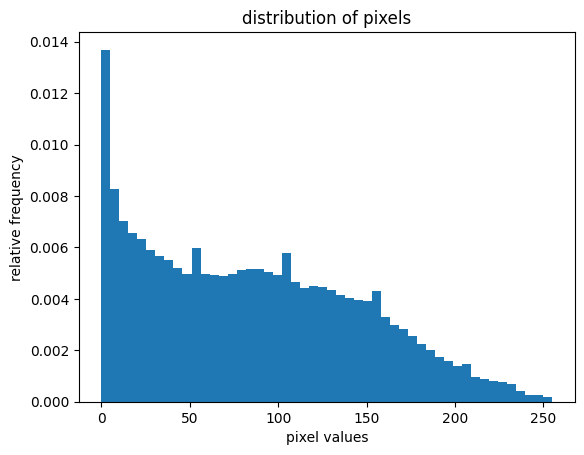

In [23]:
#Normalization of images
#Normalization helps get data within a range and reduces the skewness which helps learn faster and better.
#Normalization can also tackle the diminishing and exploding gradients problems.
import matplotlib.pyplot as plt
import numpy as np

# convert PIL image to numpy array
img_np = np.array(im1)

# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

#We find that pixel values of RGB image range from 0 to 255.

In [24]:
! pip install torchvision

Text(0.5, 1.0, 'distribution of pixels')

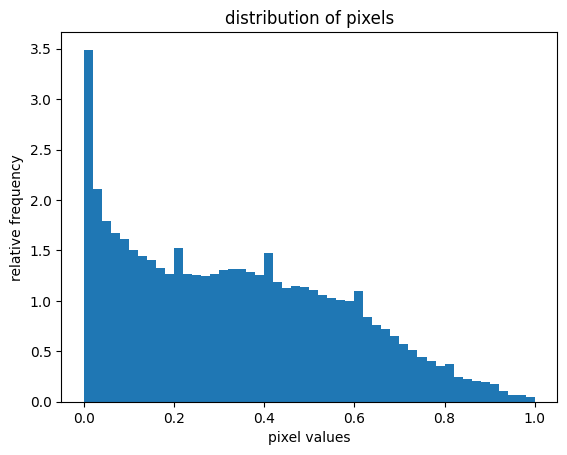

In [25]:
#Transforming images to Tensors using torchvision.transforms.ToTensor()
#Convert the PIL image to a PyTorch tensor using ToTensor()

# Python code for converting PIL Image to
# PyTorch Tensor image and plot pixel values
 
# import necessary libraries
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
 
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])
 
# transform the pIL image to tensor
# image
img_tr = transform(im1)
 
# Convert tensor image to numpy array
img_np = np.array(img_tr)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [26]:
# Python code to calculate mean and std
# of image
 
# get tensor image
img_tr = transform(im1)
 
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
 
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.4669, 0.3253, 0.2118])
Std of the image: tensor([0.2256, 0.2242, 0.1906])


Text(0.5, 1.0, 'distribution of pixels')

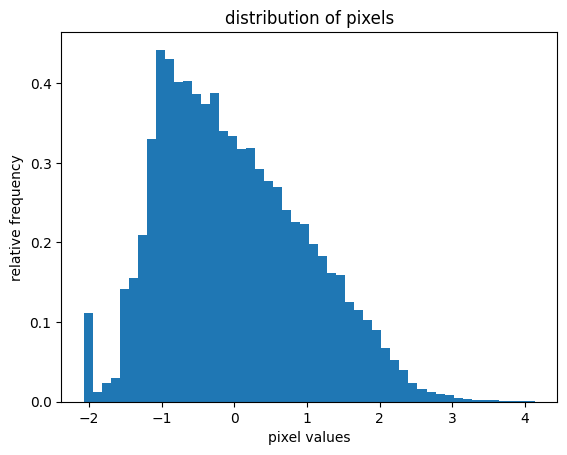

In [27]:
# python code to normalize the image

from torchvision import transforms
 
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
 
# get normalized image
img_normalized = transform_norm(im1)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

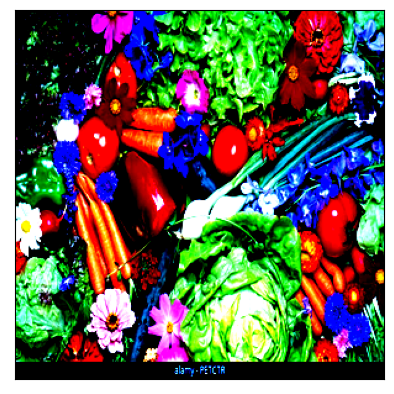

In [28]:
# Python Code to visualize normalized image
 
# get normalized image
img_normalized = transform_norm(im1)
 
# convert this image to numpy array
img_normalized = np.array(img_normalized)
 
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)
 
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])

In [29]:
#We calculate the mean and std again for normalized images/ dataset.
#Now after normalization, the mean should be 0.0, and std be 1.0.

# Python code to calculate mean and std
# of normalized image
 
# get normalized image
img_nor = transform_norm(im1)
 
# cailculate mean and std
mean, std = img_nor.mean([1,2]), img_nor.std([1,2])
 
# print mean and std
print("Mean and Std of normalized image:")
print("Mean of the image:", mean)
print("Std of the image:", std)

Mean and Std of normalized image:
Mean of the image: tensor([-1.6912e-07, -1.5598e-07, -9.5791e-09])
Std of the image: tensor([1., 1., 1.])


In [30]:
#Here we find that after normalization the values of mean and std are 0.0 and 1.0 respectively. 
#We consider that the values of "Mean of the image" are converging to the value 0.0
#This verifies that after normalize the image mean and standard deviation becomes 0 and 1 respectively.